In [1]:
%matplotlib inline

## Unsupervised Data Analysis


Welcome to the "Unsupervised Data Analysis" practical session.  

Programming Language : Python 
Editor : Jupyter Notebook. 


Pandas : Data loading, processing, transformation and manipulation.
Scikit-learn : Example data source, ML and statistical analysis

In this practical you will 

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


In [5]:
# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

print(np.unique(data.target))
# Standardize features to have zero mean and unit variance

[0 1]


In [6]:
# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df['target'] = data.target

/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

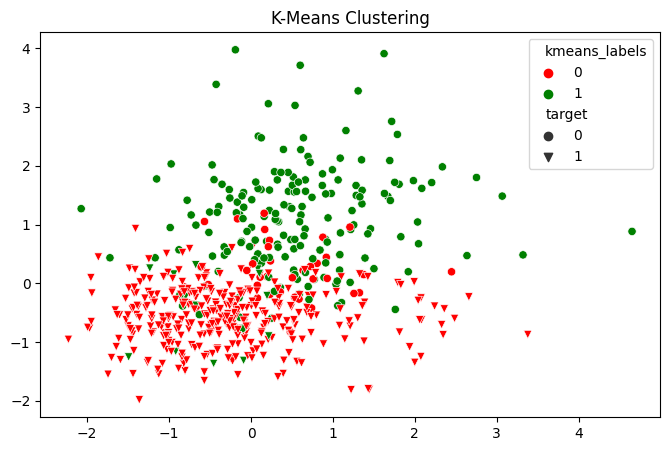

In [12]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(df_scaled)
print(kmeans_labels)
# Add k-means clustering labels and the  to dataframe
df['kmeans_labels'] = kmeans_labels


# Visualize K-Means Clustering using seaborn with different markers [ represneting the orginal target class '0' or '1' ]
markers = ['o', 'v']
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=df_scaled[:, 1], y=df_scaled[:, 2], hue='kmeans_labels', palette=['red', 'green'], style='target', markers=markers)
plt.title('K-Means Clustering')
plt.show()

# Remove labels for next clustering
df.drop('kmeans_labels', axis=1, inplace=True)

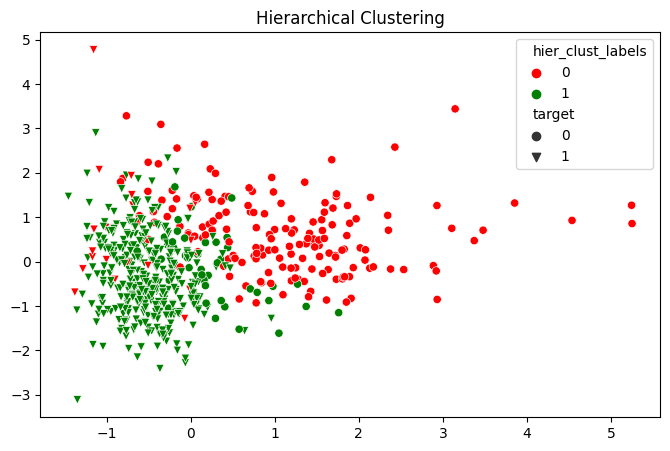

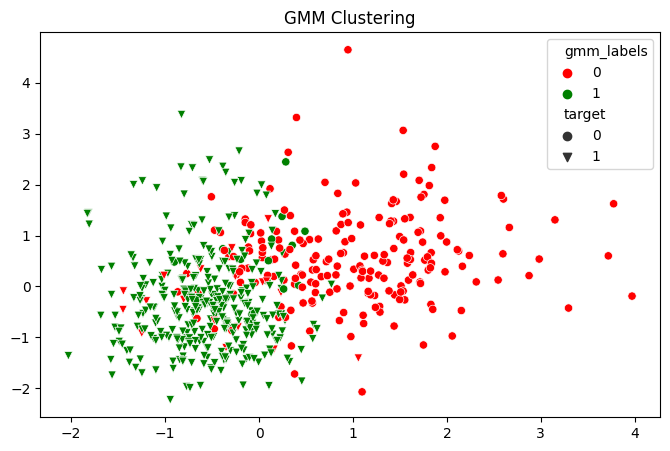

In [15]:


# Hierarchical Clustering
hier_clust = AgglomerativeClustering(n_clusters=2)
hier_clust_labels = hier_clust.fit_predict(df_scaled)

# Add labels to dataframe
df['hier_clust_labels'] = hier_clust_labels

# Visualize Hierarchical Clustering using seaborn with different markers [ represneting the orginal target class '0' or '1' ]
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=df_scaled[:, 3], y=df_scaled[:, 4], hue='hier_clust_labels', palette=['red', 'green'], style='target', markers=markers)
plt.title('Hierarchical Clustering')
plt.show()

# Remove labels for next clustering
df.drop('hier_clust_labels', axis=1, inplace=True)

# Expectation-Maximization (EM) Clustering using Gaussian Mixture Models (GMM) 
gmm = GaussianMixture(n_components=2)
gmm_labels = gmm.fit_predict(df_scaled)

# Add labels to dataframe
df['gmm_labels'] = gmm_labels

# Visualize GMM Clustering using seaborn with different markers [ represneting the orginal target class '0' or '1' ]
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=df_scaled[:, 0], y=df_scaled[:, 1], hue='gmm_labels', palette=['red', 'green'], style='target', markers=markers)
plt.title('GMM Clustering')
plt.show()



### Your Task
Now your task is to perform a similar analysis on the iris data set. 

Task 1 : Load the iris data set.
Task 2 : Save the labels from the target. How many target classes are there ? Let's assume that is n.
Task 3 : Standardize features to have zero mean and unit variance

Task 4 : Run Kmeans clustering with n components so that it returns n clusters. 
Task 5 : Run AgglomerativeClustering clustering with n components so that it returns n clusters. . 
Task 6 : Run Expectation-Maximization (EM) clustering with n components so that it returns n clusters. . 


In [ ]:
#### Your Task

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


# Complete Task 1 :Load the iris dataset. See Scikit-Lean documentation how to load datasets. 
## data = ...
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Complete Task 2 : Save the labels from the target. How many target classes are there ? Let's assume that is n.

# df['target'] = ... 
# n = ...

markers = ['o', 'v', '^']

# Complete Task 3 : Standardize features to have zero mean and unit variance
# scaler = 
# df_scaled = 


## Complete Task 4 : Run Kmeans clustering with n components so that it returns n clusters. 
## K-Means Clustering
# kmeans = KMeans( ... )
# kmeans_labels = ...

# Add labels to dataframe
df['kmeans_labels'] = kmeans_labels

# Visualize K-Means Clustering using seaborn with different markers
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=df_scaled[:, 0], y=df_scaled[:, 1], hue='kmeans_labels', palette='deep', style='target', markers=markers)
plt.title('K-Means Clustering')
plt.show()

# Remove labels for next clustering
df.drop('kmeans_labels', axis=1, inplace=True)

## Complete Task 5 : Run AgglomerativeClustering clustering with n components so that it returns n clusters. . 
## Hierarchical Clustering
# hier_clust = AgglomerativeClustering(  ... )
# hier_clust_labels = ... 

# Add labels to dataframe
df['hier_clust_labels'] = hier_clust_labels

# Visualize Hierarchical Clustering using seaborn with different markers
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=df_scaled[:, 0], y=df_scaled[:, 1], hue='hier_clust_labels', palette='deep', style='target', markers=markers)
plt.title('Hierarchical Clustering')
plt.show()

# Remove labels for next clustering
df.drop('hier_clust_labels', axis=1, inplace=True)


## Complete Task 6 : Run Expectation-Maximization (EM) clustering with n components so that it returns n clusters. . 
##  Expectation-Maximization (EM) Clustering using Gaussian Mixture Models (GMM)
# gmm = GaussianMixture(  ... )
# gmm_labels = ... 

# Add labels to dataframe
df['gmm_labels'] = gmm_labels

# Visualize GMM Clustering using seaborn with different markers
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=df_scaled[:, 0], y=df_scaled[:, 1], hue='gmm_labels', palette='deep', style='target', markers=markers)
plt.title('GMM Clustering')
plt.show()


